In [1]:
# Önce ortamımızı hazırlayalım.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Modeli oluşturacağımız ve test edeceğimiz data setimizi içeri aktararak ilk 5 satırı inceleyelim.

# Veriyi yükleyin
file_path = 'Salary_dataset.csv'
data = pd.read_csv(file_path)

# İlk 5 satırı inceleyin
data.head()




,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


Sutunlarımızda deneyimi ve maaşları görüyoruz.

In [6]:
# Elimizdeki data Gereksiz detaylardan arındırılmış bir dataya benziyor ama yine de boş hücreleri kontrol edip varsa silelim. 

data.dropna(axis= 0 , inplace= True )
data.isnull(). sum ()* 100 / len (data)

Unnamed: 0         0.0
YearsExperience    0.0
Salary             0.0
dtype: float64

In [8]:
# Şimdi datamızı test için bölerek bağımsız ve bağımlı değişkenlerimizi tamamlayalım.

X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values

# Datamızı 0.2 ve 0.8 olarak bölüyoruz.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X bağımsız değişkenimiz Deneyim Yılı, Y bağımlı değişkenimiz ise maaş oldu ve verimiiz 0.2 + 0.8 oranında böldük.

In [9]:
#Eğitim setimiz üzerindeki verilerle modelimizi oluşturup ilişkiyi belirleyen parametleri hesaplayalım.

# X_train'in ilk sütununa birler ekleyelim
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Normal Denklemi kullanarak theta'yı hesaplayın
theta_train = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

# Intercept ve slope değerlerini alın
intercept_train, slope_train = theta_train
intercept_train, slope_train


(np.float64(24380.201479473784), np.float64(9423.815323030965))

In [11]:
# Modelimizin eğitim setinde görmediği verilerin performansını değerlendirmek için tahminlerimizi yapalım.

# X_test'e de birler sütunu ekliyoruz
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Test seti üzerinde tahminimizi yapıyoruz
y_test_pred = X_test_b.dot(theta_train)


Şimdi modelimizin eğitim datası ve test datası ile nasıl bir performans gösterdiğini anlamak için performansını karşılaştırıyoruz.

In [12]:

# Eğitim setimizin tahminleri
y_train_pred = X_train_b.dot(theta_train)

# MSE hesaplama
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Eğitim Seti MSE:", mse_train)
print("Test Seti MSE:", mse_test)



Eğitim Seti MSE: 27102249.731261343
Test Seti MSE: 49830096.855908334


Eğitim Seti MSE değerimiz oldukça düşük. Bu modelin eğitim verisinde iyi tahminler yaptığını gösteriyor. Bu beklediğimiz bir sonuç çünkü modelimizi bu verilerle eğittik. 

Test Seti MSE değerimiz ise eğitim setine göre daha yüksek, eğitim için ayırdığımız veriler değerlendirilemediği için daha fazla hata yapıldı gibi görünüyor. Modelin genelleme yeteneği için önemli bir gösterge. 

Mevcut farkı değerlendirdiğimizde overfitting ihtimalinden çok genellemeyi kabul edebiliriz gibi görünüyor.

Sonuçları daha iyi görmek için görselleştirelim.

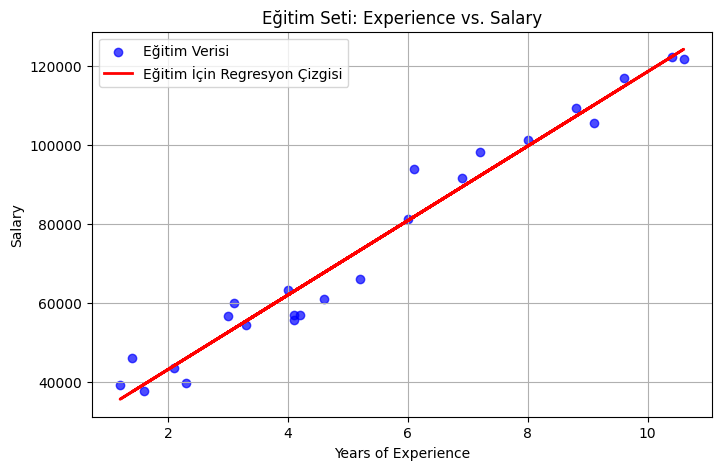

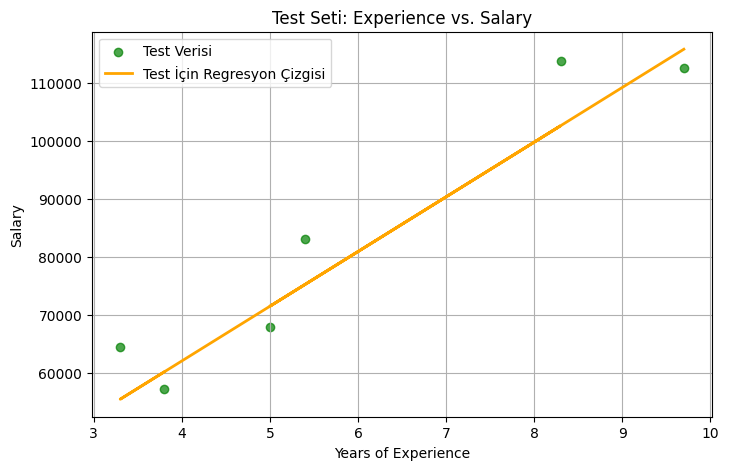

In [13]:
# Eğitim seti sonuçlarımız
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label='Eğitim Verisi', alpha=0.7)
plt.plot(X_train, y_train_pred, color='red', label='Eğitim İçin Regresyon Çizgisi', linewidth=2)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Eğitim Seti: Experience vs. Salary')
plt.legend()
plt.grid(True)
plt.show()

# Test seti sonuçlarımız
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='green', label='Test Verisi', alpha=0.7)
plt.plot(X_test, y_test_pred, color='orange', label='Test İçin Regresyon Çizgisi', linewidth=2)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Test Seti: Experience vs. Salary')
plt.legend()
plt.grid(True)
plt.show()


1. Grafikte;

Kırmızı çizgi: Modelin tahmin ettiği maaşlar. Deneyim arttıkça maaşın doğrusal bir şekilde arttığını öngörüyor.
Mavi noktalar: Gerçek maaş verileri. Her çalışan için gerçek maaş bilgilerini içeriyor.

Model, eğitim verilerinde oldukça iyi bir uyum sağlıyor gibi görünüyor. Kırmızı çizgiye yakın olan mavi noktalar, bize modelin bu veriler için iyi tahminler yaptığını gösteriyor.

2. Grafikte;

Test Seti ile Modelin Tahmin Performansını ölçüyoruz.

Turuncu çizgi: Modelin test verilerindeki tahminleri. Eğitim verisinden öğrendiği ilişkiye dayanarak test verisi için maaş tahminlerini yapıyor.
Yeşil noktalar: Gerçek maaşlar. Test setine ait çalışanların maaşları.

Test verisindeki noktalarımız turuncu çizgiden çok uzaklaşmıyor, dolayısıla model test verileri üzerinde de iyi tahminler yapıyor demektir.
